### О задании

Задание состоит из двух разделов, посвященных работе с табличными данными с помощью библиотеки pandas и визуализации с помощью matplotlib. В первом разделе вам предстоит выполнить базовые задания с помощью вышеуказанных библиотек, а во втором распределить студентов по курсам.



## 1. Табличные данные и Pandas

In [17]:
%pylab inline
import pandas as pd

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


##### В первой части задания (до раздела "Распределение студентов по курсам") использование циклов запрещается и повлечет за собой снижение оценки. Использование <code>vectorize</code> и  <code>apply</code>, <code>apply_along_axis</code> крайне нежелательно.

#### 1. [1 балл] Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк.

Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк, какие столбцы? (на это не надо отвечать, просто подумайте об этом)

In [28]:
df = pd.read_excel('_end_seminar.xlsx')

df.tail(10)

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
351,2020-05-18 23:58:33.903,8fe79f84f36e3a5d2d6745621321302c,1016,NaN,NaN,Безопасность компьютерных систем,Высокопроизводительные вычисления,Сбор и обработка данных с помощью краудсорсинга,Конфликты и кооперация,Проектирование и разработка высоконагруженных ...,Символьные вычисления,Да,0.942029,174.0,DevOps,NaN
352,2020-05-18 23:59:20.831,f93afd8e92c336b471aa3bbbc579aefe,1298,NaN,NaN,Высокопроизводительные вычисления,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Методы сжатия и передачи медиаданных,Проектирование и разработка высоконагруженных ...,Конфликты и кооперация,Да,0.057971,175.0,DevOps,NaN
353,2020-05-18 23:59:28.998,9963fc00d9405a35b894cc04a7e19855,1135,NaN,NaN,Безопасность компьютерных систем,Высокопроизводительные вычисления,Безопасность компьютерных систем,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Символьные вычисления,Да,0.572464,175.0,DevOps,NaN
354,2020-05-19 08:55:39.509,98c5a2548d93f26bd4195466e93178b3,1035,NaN,NaN,Байесовские методы машинного обучения,Глубинное обучение в обработке звука,Statistical Learning Theory,Обучение с подкреплением,Генеративные модели в машинном обучении,Методы сжатия и передачи медиаданных,Нет,0.905797,171.0,DevOps,NaN
355,2020-05-19 18:58:06.283,ba298cbd9be59b84bab33325e956f27e,1155,NaN,NaN,Сбор и обработка данных с помощью краудсорсинга,Байесовские методы машинного обучения,Анализ неструктурированных данных,Конфликты и кооперация,Обучение с подкреплением,Компьютерное зрение,Да,0.507246,171.0,Соревновательный анализ данных,NaN
356,2020-05-19 19:04:17.873,c5870b37ee3f672e4259dfb2fc02ed8f,1029,NaN,NaN,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,Да,0.920290,174.0,DevOps,NaN
357,2020-05-19 20:19:25.815,f44aea1095f9f5b8e2f5f0ed2b17891b,1060,NaN,NaN,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Конфликты и кооперация,Обучение с подкреплением,Численные методы,Да,0.840580,174.0,DevOps,NaN
358,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,NaN,NaN,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Численные методы,Да,0.652174,173.0,Соревновательный анализ данных,NaN
359,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,NaN,NaN,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,NaN
360,2020-05-23 21:16:40.916,f2d210ace25a841e1e58036b257d5d47,1195,NaN,NaN,Анализ неструктурированных данных,Моделирование временных рядов,Высокопроизводительные вычисления,Обучение с подкреплением,Компьютерное зрение,Методы сжатия и передачи медиаданных,NaN,0.369565,176.0,Соревновательный анализ данных,NaN


#### 2. [2 балла] Есть ли в данных пропуски? В каких колонках? Сколько их в каждой из этих колонок?

In [30]:
missing_values = df.isnull().sum()

print(missing_values)

timestamp          0
id                 0
rating             0
18_group         138
is_mi            343
fall_1             0
fall_2             0
fall_3             0
spring_1           0
spring_2           0
spring_3           0
is_first_time      2
percentile         0
17_group         223
blended          223
is_ml_student    304
dtype: int64


Пропуски есть в столбцах: 18_group, is_mi, 17_group, is_first_time, blended, is_ml_student.

Заполните пропуски пустой строкой для строковых колонок и нулём для числовых (постарайтесь избежать перечисления названий всех столбцов).

In [33]:
numeric_cols = df.select_dtypes(include=['number']).columns
string_cols = df.select_dtypes(include=['object']).columns

df[numeric_cols] = df[numeric_cols].fillna(0)
df[string_cols] = df[string_cols].fillna('')

df.isnull().sum()

timestamp        0
id               0
rating           0
18_group         0
is_mi            0
fall_1           0
fall_2           0
fall_3           0
spring_1         0
spring_2         0
spring_3         0
is_first_time    0
percentile       0
17_group         0
blended          0
is_ml_student    0
dtype: int64

#### 3. [3 балла] Посмотрите повнимательнее на колонку 'is_first_time'.

Есть ли в ней ответы "Нет"? Сколько их?

Если вы найдете повторные обращения студентов, оставьте только самую позднюю версию. В дальнейших заданиях используйте версию данных без повторов.

<i>Обращения со значением "Нет" в 'is_first_time' могут быть как повторными, так и первичными, поскольку поле заполняли сами студенты.</i>

In [35]:
print("Уникальные значения в колонке 'is_first_time':")
print(df['is_first_time'].value_counts())

no_count = (df['is_first_time'] == 'Нет').sum()
print(f"\nКоличество ответов 'Нет' в колонке 'is_first_time': {no_count}")

df_sorted = df.sort_values(by=['id', 'timestamp'], ascending=[True, False])
df_unique = df_sorted.drop_duplicates(subset='id', keep='first')

print(f"\nИсходное количество записей: {len(df)}")
print(f"Количество записей после удаления повторов: {len(df_unique)}")

# Перезаписываем исходный DataFrame df без дубликатов
df = df_unique.copy()
print(f"\nКоличество записей в основном DataFrame после удаления дубликатов: {len(df)}")

Уникальные значения в колонке 'is_first_time':
Да     308
Нет     51
         2
Name: is_first_time, dtype: int64

Количество ответов 'Нет' в колонке 'is_first_time': 51

Исходное количество записей: 361
Количество записей после удаления повторов: 347

Количество записей в основном DataFrame после удаления дубликатов: 347


#### 4. [4 балла] Ответьте на вопросы:
1. Сколько было заявок из групп 18-го года набора, а сколько из групп 17-го года?
2. Есть ли студенты с равными перцентилями (среди объединенных данных, ведь конкурс на каждый курс общий)?

In [37]:
#1
applications_18 = df['18_group'].sum()
applications_17 = df['17_group'].sum()

print("Заявки по году набора:")
print(f"18-й год набора: {int(applications_18)} заявок")
print(f"17-й год набора: {int(applications_17)} заявок")

#2
percentile_counts = df['percentile'].value_counts()

has_duplicates = (percentile_counts > 1).any()
duplicate_count = (percentile_counts > 1).sum()
total_duplicate_students = (percentile_counts[percentile_counts > 1] - 1).sum()

print(f"\nЕсть повторяющиеся перцентили: {'Да' if has_duplicates else 'Нет'}")
print(f"Количество повторяющихся перцентилей: {duplicate_count}")
print(f"Всего студентов с повторяющимися перцентилями: {int(total_duplicate_students)}")

Заявки по году набора:
18-й год набора: 39292 заявок
17-й год набора: 23232 заявок

Есть повторяющиеся перцентили: Да
Количество повторяющихся перцентилей: 1
Всего студентов с повторяющимися перцентилями: 1


#### 5. [2 балла] Какие  blended-курсы для четверокурсников существуют? На какой blended-курс записалось наибольшее количество студентов? На каком из blended-курсов собрались студенты с самым высоким средним рейтингом (выведите этот курс и количество студентов на нем)?

In [39]:
# Оставляем только четверокурсников
fourth_course = df[df['17_group']>0]

# Какие blended-курсы существуют для четверокурсников
blended_courses = fourth_course['blended'].unique()
print(f"Blended-курсы для четверокурсников:, {blended_courses}")

# Количество студентов на каждом blended-курсе
course_enrollment = fourth_course['blended'].value_counts()
most_popular_course = course_enrollment.index[0]
most_popular_count = course_enrollment.iloc[0]

print(f"\nСамый популярный курс: {most_popular_course}")
print(f"Количество студентов: {most_popular_count}")

# Средний рейтинг на каждом blended-курсе
course_ratings = fourth_course.groupby('blended')['rating'].mean()
highest_rated_course = course_ratings.idxmax()
highest_rating = course_ratings.max()
students_the_highest_rated = course_enrollment[highest_rated_course]

print(f"\nКурс с самым высоким средним рейтингом: {highest_rated_course}")
print(f"Средний рейтинг: {highest_rating:.2f}")
print(f"Количество студентов: {students_the_highest_rated}")

Blended-курсы для четверокурсников:, ['Соревновательный анализ данных' 'DevOps'
 'Введение в дифференциальную геометрию']

Самый популярный курс: DevOps
Количество студентов: 87

Курс с самым высоким средним рейтингом: Введение в дифференциальную геометрию
Средний рейтинг: 1210.73
Количество студентов: 15


#### 6. [4 балл] Выясните, есть ли студенты с абсолютно одинаковыми предпочтениями по всем курсам.

Для этого сформируйте таблицу, где для каждого возможного набора курсов посчитано количество студентов, выбравших такой набор, и оставьте только строки где это количество больше 1.

В данном случае набор курсов задается упорядоченным множеством ('fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended'). Элемент blended будет нулевым для 3-го курса.

In [41]:
courses_columns = ['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended']
df['course_combination'] = df[courses_columns].astype(str).agg('_'.join, axis=1)

course_combinations = df['course_combination'].value_counts().reset_index()
course_combinations.columns = ['course_combination', 'student_count']

duplicate_combinations = course_combinations[course_combinations['student_count'] > 1]

indentical_set_of_courses_df = duplicate_combinations.copy()
indentical_set_of_courses_df.index = indentical_set_of_courses_df.index + 1  # Индексация с 1

print("Студенты с одинаковыми наборами курсов:")
display(indentical_set_of_courses_df)

print(f"\nВсего уникальных комбинаций курсов: {len(course_combinations)}")
print(f"Комбинаций с повторениями: {len(duplicate_combinations)}")

Студенты с одинаковыми наборами курсов:


,course_combination,student_count
1,Безопасность компьютерных систем_Statistical L...,3
2,Безопасность компьютерных систем_Высокопроизво...,3
3,Высокопроизводительные вычисления_Безопасность...,2
4,Байесовские методы машинного обучения_Анализ н...,2
5,Безопасность компьютерных систем_Теория баз да...,2
6,Байесовские методы машинного обучения_Анализ н...,2
7,Безопасность компьютерных систем_Матричные выч...,2
8,Моделирование временных рядов_Сбор и обработка...,2
9,Сбор и обработка данных с помощью краудсорсинг...,2
10,Безопасность компьютерных систем_Высокопроизво...,2



Всего уникальных комбинаций курсов: 330
Комбинаций с повторениями: 15


#### 7. [4 балла] Найдите курсы по выбору, на которые записывались как студенты 18-го года набора, так и студенты 17-го года.

In [43]:
df_18 = df['18_group'] > 0
df_17 = df['17_group'] > 0

# Находим уникальные значения курсов
courses_18 = df.loc[df_18, courses_columns].melt()['value'].dropna().unique()
courses_17 = df.loc[df_17, courses_columns].melt()['value'].dropna().unique()

# Находим пересечение курсов
common_courses = np.intersect1d(courses_18, courses_17)

course_17_18_df = pd.DataFrame({
    'Курсы для обоих годов набора': common_courses
})
course_17_18_df.index = course_17_18_df.index + 1

display(course_17_18_df)

,Курсы для обоих годов набора
1,Statistical Learning Theory
2,Безопасность компьютерных систем
3,Высокопроизводительные вычисления
4,Моделирование временных рядов
5,Принятие решений в условиях риска и неопределё...
6,Сбор и обработка данных с помощью краудсорсинга
7,Численные методы


Методом исключения найдите курсы, которые предлагались только студентам 18-го года и только студентам 17-го года.

In [45]:
only_18_courses = np.setdiff1d(courses_18, courses_17)  # Только для 18-го года
only_17_courses = np.setdiff1d(courses_17, courses_18)  # Только для 17-го года
common_courses = np.intersect1d(courses_18, courses_17)  # Общие курсы

only_17_18_courses_df = pd.DataFrame({
    'Только для 18-го года': pd.Series(only_18_courses),
    'Только для 17-го года': pd.Series(only_17_courses),
    'Общие курсы': pd.Series(common_courses)
})

result_df = only_17_18_courses_df.fillna('')
result_df.index = result_df.index + 1

print("Распределение курсов по годам набора:")
display(result_df)

Распределение курсов по годам набора:


,Только для 18-го года,Только для 17-го года,Общие курсы
1,,DevOps,Statistical Learning Theory
2,Анализ данных в бизнесе,Анализ неструктурированных данных,Безопасность компьютерных систем
3,Дискретная оптимизация,Байесовские методы машинного обучения,Высокопроизводительные вычисления
4,Дополнительные главы прикладной статистики,Введение в дифференциальную геометрию,Моделирование временных рядов
5,Компьютерные сети,Генеративные модели в машинном обучении,Принятие решений в условиях риска и неопределё...
6,Матричные вычисления,Глубинное обучение в обработке звука,Сбор и обработка данных с помощью краудсорсинга
7,Машинное обучение 2,Компьютерное зрение,Численные методы
8,Промышленное программирование на языке Java,Конфликты и кооперация,
9,Системы баз данных,Методы сжатия и передачи медиаданных,
10,Теория баз данных,Обучение с подкреплением,


### Визуализации и matplotlib

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
mpl.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

#### 8. [4 балла] Постройте график средних рейтингов по дням получения ответов (bar plot).

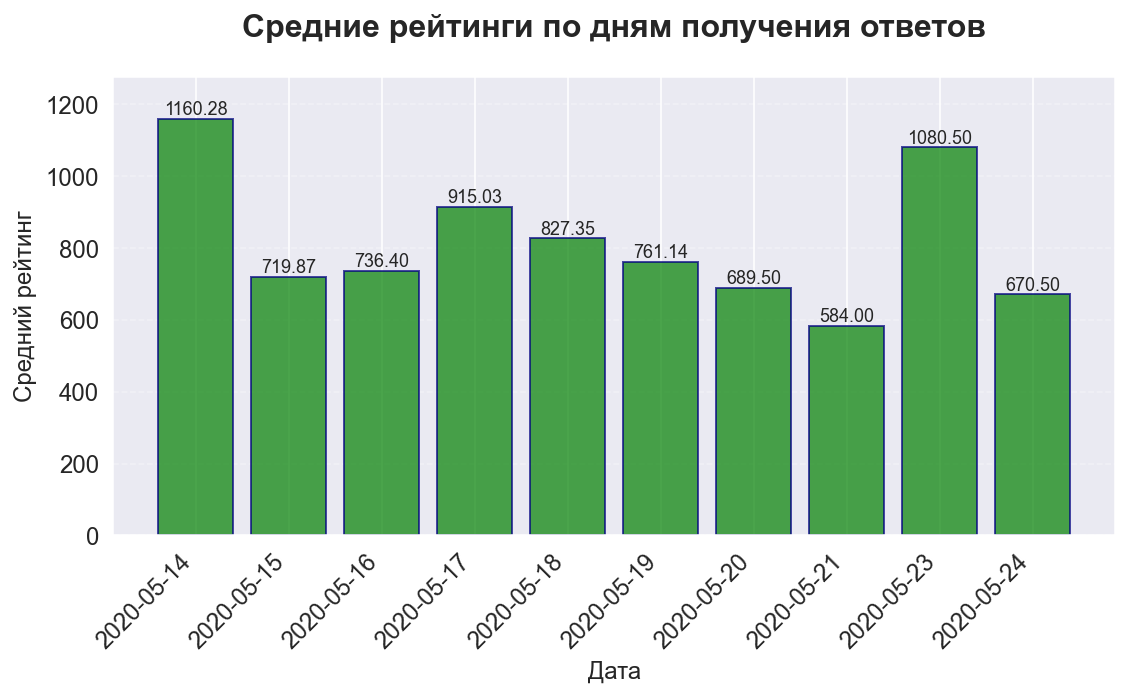

Период данных: с 2020-05-14 по 2020-05-24
Количество дней с ответами: 10
Общий средний рейтинг: 836.34


In [50]:
from datetime import datetime

#plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Конвертируем timestamp в дату
df['date'] = pd.to_datetime(df['timestamp']).dt.date

# Группируем по датам и считаем средний рейтинг
daily_ratings = df.groupby('date')['rating'].mean().reset_index()

# Сортируем по дате для правильного порядка на графике
daily_ratings = daily_ratings.sort_values('date')

mean_rating_plot = plt.bar(daily_ratings['date'].astype(str), daily_ratings['rating'],
        color='green', edgecolor='navy', alpha=0.7)

# Настройки графика
plt.title('Средние рейтинги по дням получения ответов', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Средний рейтинг', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.ylim(0, max(daily_ratings['rating']) * 1.1)  # Запас 10% сверху

# Добавляем значения на столбцы
for i, v in enumerate(daily_ratings['rating']):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()

plt.savefig('average_ratings_by_day.pdf')

plt.show()

print(f"Период данных: с {daily_ratings['date'].min()} по {daily_ratings['date'].max()}")
print(f"Количество дней с ответами: {len(daily_ratings)}")
print(f"Общий средний рейтинг: {df['rating'].mean():.2f}")

Сохраните график в формате pdf (так он останется векторизованным).

**Сохранение в ячейке выше: plt.savefig('average_ratings_by_day.pdf')**

### 2. Распределение студентов по курсам.

Теперь вам нужно распределить студентов по осенним курсам по выбору, учитывая их предпочтения.

Алгоритм распределения студентов по курсам:
1. По умолчанию на каждой дисциплине по выбору у 3 и 4 курсов может учиться 1 группа (до 30 студентов). Исключения описаны ниже. На blended-дисциплинах для четверокурсников количество мест не ограничено.
2. Проводится первая волна отбора. Для каждой дисциплины формируется список тех, кто указал её первым приоритетом (если студент должен выбрать два курса по выбору, то для него дисциплины, которые он указал первым и вторым приоритетом, рассматриваются как дисциплины первого приоритета). Если желающих больше, чем мест, то выбирается топ по перцентилю рейтинга.
3. На дисциплинах, где остались места после первой волны, формируются списки тех, кто выбрал их вторым приоритетом и еще не прошел на необходимое количество курсов. Места заполняются лучшими по перцентилю рейтинга студентами. После этого проводится такая же процедура для дисциплин третьего приоритета.
4. Если студент не попал на необходимое количество курсов по итогам трёх волн, с ним связывается учебный офис и решает вопрос в индивидуальном порядке.

Обращаем ваше внимание на следующие детали:
- Конкурс на каждый курс общий для 3-го и 4-го курса

- По умолчанию студент выбирает один осенний и один весенний курс по выбору, а также четверокурсники выбирают один blended-курс. Студенты групп 17-го года специализаций МОП и ТИ выбирают по 2 осенних и 2 весенних курса по выбору, также студенты групп 18' специализации МИ выбирают 2 осенних курса. <i>Для студентов, которые выбирают 2 курса (например, осенних) первый приоритет — <code>fall_1</code> и <code>fall_2</code>, второй приоритет — <code>fall_3</code>. Такие студенты участвуют только в двух волнах отбора</i>.

- Студенты специализации МОП не могут выбрать весенним курсом по выбору Машинное обучение 2. **Если студент специализации МОП выбрал Машинное обучение 2, то его приоритеты сдвигаются.** Из-за совпадений первого и второго курса по выбору двигать приоритеты не надо.

- Blended-курсы не трогайте, по ним не надо распределять, на другие курсы они никак не влияют.

- Заведомо известно, что в процессе распределения не возникнет ситуации, когда на одно место претендуют студенты с одинаковым перцентилем.

- Постарайтесь воздержаться от использования циклов там, где это возможно. <i>Допустимо итерироваться по <b>курсам</b>, на которые проводится отбор, и по <b>волнам</b> отбора.  <b>Дублирование кода не признается успешным избавлением от циклов</b></i>

- На выходе ожидается файл res_fall.csv с результатами распределения на осенние курсы по выбору. Файл должен быть следующего формата:

    * Три колонки: ID, course1, course2
    
    * Если студент не попал на курс, но должен был, то вместо названия курса в ячейке должна быть строка "???"
    
    * Если студент должен выбрать только один курс, то в колонке course2 для него должна стоять строка "-"
    
    * Если студент должен выбрать два курса по выбору, то порядок в колонках course1 и course2 не важен.
    
    * hint: для сохранения воспользуйтесь df.to_csv('solution.csv', index=None)
    

Для работы вам могут понадобиться следующие данные:

- Результаты опроса (вы уже использовали этот файл в первой части задания, но на всякий случай ссылка: https://www.dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=0)

- Соответствие номеров групп специализациям:

    * 171, 172 - МОП; 173 - ТИ; 174 — АДИС; 175, 176 — РС; 177 — АПР
    
    * У студентов 18-го года номера групп соответствуют номерам до распределения по специализациям. Это означает, что по номеру группы 18* нельзя однозначно определить специализацию студента. При этом в рамках распределения важно знать информацию только о двух из них: МОП и МИ. Эти знание можно получить из колонок 'is_ml_student
' и 'is_mi' соответственно.

- Ограничения по количеству мест на курсах по выбору:

    * Осенние: везде 30 мест, кроме Statistical Learning Theory (60 мест), Высокопроизводительных вычислений (60 мест), Анализа неструктурированных данных ($\infty$ мест)

    * Весенние: везде 30 мест, кроме Обучения с подкреплением (60 мест), Анализа данных в бизнесе (60 мест).


Кстати, убедитесь, что в данных больше нет пропусков и повторных записей.

#### 0. Проверка

Для начала давайте убедимся, что вы успешно выполнили задания первой части и проверим ваши данные на наличие пропусков и повторов:

In [59]:
assert df.shape[0] == 347, 'В таблице остались повторы или потеряны данные'

assert df.isna().sum().sum() == 0, 'В таблице остались пропуски'

Если вы не получили AssertionError, то можете продолжать.

#### 1. [4 балл] Создайте новый признак, обозначающий, сколько осенних курсов должен выбрать студент

В этом вам может помочь информация о специализации и группе стундента.

In [62]:
# преобразуем тип данных в float
df['17_group'].astype(float)

161      0.0
76       0.0
335    173.0
88       0.0
78       0.0
       ...  
135      0.0
281    171.0
103      0.0
307    171.0
139      0.0
Name: 17_group, Length: 347, dtype: float64

In [63]:
df.dtypes

timestamp             datetime64[ns]
id                            object
rating                         int64
18_group                     float64
is_mi                        float64
fall_1                        object
fall_2                        object
fall_3                        object
spring_1                      object
spring_2                      object
spring_3                      object
is_first_time                 object
percentile                   float64
17_group                     float64
blended                       object
is_ml_student                float64
course_combination            object
date                          object
dtype: object

In [64]:
df['is_mi'].value_counts()

0.0    331
1.0     16
Name: is_mi, dtype: int64

In [65]:
# (￣^￣)ゞ
# Группы 17-го набора, которые имеют 2 осенних курса: 171, 172, 173
# Группа 18-го набора, которая имеет 2 осенних курса: is_mi = '1.0', таких 16

df['fall_courses'] = 1
df.loc[(df['is_mi'] == 1) | ((df['17_group'] >= 171) & (df['17_group'] <= 173)), 'fall_courses'] = 2
df

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,course_combination,date,fall_courses
161,2020-05-18 22:08:11.668,00b40fe7dbfd23e5daba765244509415,542,187.0,0.0,Безопасность компьютерных систем,Язык SQL,Матричные вычисления,Промышленное программирование на языке Java,Компьютерные сети,Анализ данных в бизнесе,Да,0.896861,0.0,,0.0,Безопасность компьютерных систем_Язык SQL_Матр...,2020-05-18,1
76,2020-05-18 16:47:43.131,014b72217e20370dab7acc48b20c47be,543,186.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Матричные вычисления,Системы баз данных,Машинное обучение 2,Дискретная оптимизация,Да,0.892377,0.0,,0.0,Сбор и обработка данных с помощью краудсорсинг...,2020-05-18,1
335,2020-05-18 23:01:39.666,01b072a0cdb45814fc4ab8ca3e621f0e,1058,0.0,0.0,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Моделирование временных рядов,Обучение с подкреплением,Компьютерное зрение,Символьные вычисления,Да,0.847826,173.0,Соревновательный анализ данных,0.0,Анализ неструктурированных данных_Сбор и обраб...,2020-05-18,2
88,2020-05-18 17:56:00.688,044e038535ae5d2ff037150b77fdc6d1,710,182.0,0.0,Безопасность компьютерных систем,Statistical Learning Theory,Матричные вычисления,Дискретная оптимизация,Промышленное программирование на языке Java,Дополнительные главы прикладной статистики,Да,0.139013,0.0,,1.0,Безопасность компьютерных систем_Statistical L...,2020-05-18,1
78,2020-05-18 17:00:34.890,04b88fcbe5ba58aa8369c7de5e574de0,719,181.0,0.0,Безопасность компьютерных систем,Моделирование временных рядов,Высокопроизводительные вычисления,Дискретная оптимизация,Компьютерные сети,Промышленное программирование на языке Java,Да,0.121076,0.0,,0.0,Безопасность компьютерных систем_Моделирование...,2020-05-18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2020-05-18 21:19:50.620,feb53dcdd28fff9dc4a981c3419fea6f,521,186.0,1.0,Безопасность компьютерных систем,Язык SQL,Сбор и обработка данных с помощью краудсорсинга,Промышленное программирование на языке Java,Анализ данных в бизнесе,Машинное обучение 2,Нет,0.968610,0.0,,0.0,Безопасность компьютерных систем_Язык SQL_Сбор...,2020-05-18,2
281,2020-05-18 14:29:51.415,fecff7bd30995d16b59fb392d47b3760,1278,0.0,0.0,Анализ неструктурированных данных,Безопасность компьютерных систем,Байесовские методы машинного обучения,Обучение с подкреплением,Компьютерное зрение,Генеративные модели в машинном обучении,Да,0.094203,171.0,DevOps,0.0,Анализ неструктурированных данных_Безопасность...,2020-05-18,2
103,2020-05-18 19:23:23.735,ff549c331d45453052f28ad2614afda9,723,182.0,0.0,Моделирование временных рядов,Теория баз данных,Матричные вычисления,Численные методы,Анализ данных в бизнесе,Промышленное программирование на языке Java,Да,0.107623,0.0,,0.0,Моделирование временных рядов_Теория баз данны...,2020-05-18,1
307,2020-05-18 21:00:45.274,ffc04c64d068f8d85e4dc44e7f297ecc,1163,0.0,0.0,Байесовские методы машинного обучения,Statistical Learning Theory,Глубинное обучение в обработке звука,Обучение с подкреплением,Генеративные модели в машинном обучении,Компьютерное зрение,Нет,0.471014,171.0,Соревновательный анализ данных,0.0,Байесовские методы машинного обучения_Statisti...,2020-05-18,2


In [66]:
df.dtypes

timestamp             datetime64[ns]
id                            object
rating                         int64
18_group                     float64
is_mi                        float64
fall_1                        object
fall_2                        object
fall_3                        object
spring_1                      object
spring_2                      object
spring_3                      object
is_first_time                 object
percentile                   float64
17_group                     float64
blended                       object
is_ml_student                float64
course_combination            object
date                          object
fall_courses                   int64
dtype: object

Проверка:

In [68]:
col_name = 'fall_courses'   # insert your new column name as str

assert(df[df['id'] == '2662600c2c37e11e62f6ee0b88452f22'][col_name] == 2).all()
assert(df[df['id'] == 'd555d2805e1d93d4f023e57dc4c8f403'][col_name] == 2).all()
assert(df[df['id'] == '8fe79f84f36e3a5d2d6745621321302c'][col_name] == 1).all()
assert(df[df['id'] == 'e4caca755ee0bdd711e18fb8084958b5'][col_name] == 1).all()

#### 2. [8 балла] Распределите студентов в соответствии с первым приоритетом

In [70]:
# (￣^￣)ゞ
# выбрали всех студентов из 17-ой у которых не указана группа
df[df['17_group'] == 0]

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,course_combination,date,fall_courses
161,2020-05-18 22:08:11.668,00b40fe7dbfd23e5daba765244509415,542,187.0,0.0,Безопасность компьютерных систем,Язык SQL,Матричные вычисления,Промышленное программирование на языке Java,Компьютерные сети,Анализ данных в бизнесе,Да,0.896861,0.0,,0.0,Безопасность компьютерных систем_Язык SQL_Матр...,2020-05-18,1
76,2020-05-18 16:47:43.131,014b72217e20370dab7acc48b20c47be,543,186.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Матричные вычисления,Системы баз данных,Машинное обучение 2,Дискретная оптимизация,Да,0.892377,0.0,,0.0,Сбор и обработка данных с помощью краудсорсинг...,2020-05-18,1
88,2020-05-18 17:56:00.688,044e038535ae5d2ff037150b77fdc6d1,710,182.0,0.0,Безопасность компьютерных систем,Statistical Learning Theory,Матричные вычисления,Дискретная оптимизация,Промышленное программирование на языке Java,Дополнительные главы прикладной статистики,Да,0.139013,0.0,,1.0,Безопасность компьютерных систем_Statistical L...,2020-05-18,1
78,2020-05-18 17:00:34.890,04b88fcbe5ba58aa8369c7de5e574de0,719,181.0,0.0,Безопасность компьютерных систем,Моделирование временных рядов,Высокопроизводительные вычисления,Дискретная оптимизация,Компьютерные сети,Промышленное программирование на языке Java,Да,0.121076,0.0,,0.0,Безопасность компьютерных систем_Моделирование...,2020-05-18,1
221,2020-05-24 01:21:31.946,04bcb5c9d23813ffa940e1febb27fadc,646,186.0,0.0,Теория баз данных,Высокопроизводительные вычисления,Безопасность компьютерных систем,Компьютерные сети,Дискретная оптимизация,Машинное обучение 2,Нет,0.430493,0.0,,0.0,Теория баз данных_Высокопроизводительные вычис...,2020-05-24,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,2020-05-18 20:34:07.220,fc2c60b8004aa91bc272df84628621ff,639,183.0,0.0,Язык SQL,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Системы баз данных,Машинное обучение 2,Анализ данных в бизнесе,Нет,0.461883,0.0,,1.0,Язык SQL_Сбор и обработка данных с помощью кра...,2020-05-18,1
89,2020-05-18 18:01:52.604,fd784637a19d65bbe5b07d6efac5a05d,625,182.0,0.0,Безопасность компьютерных систем,Statistical Learning Theory,Матричные вычисления,Машинное обучение 2,Дискретная оптимизация,Компьютерные сети,Да,0.533632,0.0,,0.0,Безопасность компьютерных систем_Statistical L...,2020-05-18,1
135,2020-05-18 21:19:50.620,feb53dcdd28fff9dc4a981c3419fea6f,521,186.0,1.0,Безопасность компьютерных систем,Язык SQL,Сбор и обработка данных с помощью краудсорсинга,Промышленное программирование на языке Java,Анализ данных в бизнесе,Машинное обучение 2,Нет,0.968610,0.0,,0.0,Безопасность компьютерных систем_Язык SQL_Сбор...,2020-05-18,2
103,2020-05-18 19:23:23.735,ff549c331d45453052f28ad2614afda9,723,182.0,0.0,Моделирование временных рядов,Теория баз данных,Матричные вычисления,Численные методы,Анализ данных в бизнесе,Промышленное программирование на языке Java,Да,0.107623,0.0,,0.0,Моделирование временных рядов_Теория баз данны...,2020-05-18,1


In [71]:
# записываем все наборы курсов этих студентов
fall_type = ['fall_1', 'fall_2', 'fall_3']
fall_courses_18_group = df[df['17_group'] == 0][fall_type].values
fall_courses_18_group

array([['Безопасность компьютерных систем', 'Язык SQL',
        'Матричные вычисления'],
       ['Сбор и обработка данных с помощью краудсорсинга',
        'Statistical Learning Theory', 'Матричные вычисления'],
       ['Безопасность компьютерных систем',
        'Statistical Learning Theory', 'Матричные вычисления'],
       ['Безопасность компьютерных систем',
        'Моделирование временных рядов',
        'Высокопроизводительные вычисления'],
       ['Теория баз данных', 'Высокопроизводительные вычисления',
        'Безопасность компьютерных систем'],
       ['Безопасность компьютерных систем',
        'Сбор и обработка данных с помощью краудсорсинга',
        'Statistical Learning Theory'],
       ['Безопасность компьютерных систем', 'Матричные вычисления',
        'Теория баз данных'],
       ['Матричные вычисления', 'Высокопроизводительные вычисления',
        'Безопасность компьютерных систем'],
       ['Безопасность компьютерных систем',
        'Моделирование временных рядов'

In [72]:
# оставляем только уникальные курсы и преобразуем в одномерный массив
fall_courses_18_group = set(pd.unique(fall_courses_18_group.flatten()))
fall_courses_18_group

{'Statistical Learning Theory',
 'Безопасность компьютерных систем',
 'Высокопроизводительные вычисления',
 'Матричные вычисления',
 'Моделирование временных рядов',
 'Принятие решений в условиях риска и неопределённости',
 'Сбор и обработка данных с помощью краудсорсинга',
 'Теория баз данных',
 'Язык SQL'}

In [73]:
# уникальные курсы 18-ой группы, у которых номер группы не указан
fall_courses_17_group = df[df['18_group'] == 0][fall_type].values
fall_courses_17_group = set(pd.unique(fall_courses_17_group.flatten()))
fall_courses_17_group

{'Statistical Learning Theory',
 'Анализ неструктурированных данных',
 'Байесовские методы машинного обучения',
 'Безопасность компьютерных систем',
 'Высокопроизводительные вычисления',
 'Глубинное обучение в обработке звука',
 'Моделирование временных рядов',
 'Принятие решений в условиях риска и неопределённости',
 'Сбор и обработка данных с помощью краудсорсинга'}

In [74]:
# DataFrame с курсами
fall_courses_17_18 = pd.DataFrame(index=(fall_courses_18_group | fall_courses_17_group)) 

# Присваиваем каждому курсу кол-во свободных мест для этого курса
free_places_60 = ['Statistical Learning Theory', 'Высокопроизводительные вычисления']
free_places_infty = ['Анализ неструктурированных данных']

fall_courses_17_18['free_places'] = 30 # по умолчанию
fall_courses_17_18['free_places'][free_places_60] = 60
fall_courses_17_18['free_places'][free_places_infty] = df.shape[0] + 1 # не ограничено мест

fall_courses_17_18

,free_places
Высокопроизводительные вычисления,60
Анализ неструктурированных данных,348
Принятие решений в условиях риска и неопределённости,30
Матричные вычисления,30
Моделирование временных рядов,30
Глубинное обучение в обработке звука,30
Язык SQL,30
Байесовские методы машинного обучения,30
Statistical Learning Theory,60
Сбор и обработка данных с помощью краудсорсинга,30


In [75]:
# заполняем ??? Если студент не попал на курс, заполняем - Если студент должен выбрать только один курс
df['fall_course_1'] = '???'
df['fall_course_2'] = '???'
df.loc[df['fall_courses'] == 1, 'fall_course_2'] = '-'

df

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,...,is_first_time,percentile,17_group,blended,is_ml_student,course_combination,date,fall_courses,fall_course_1,fall_course_2
161,2020-05-18 22:08:11.668,00b40fe7dbfd23e5daba765244509415,542,187.0,0.0,Безопасность компьютерных систем,Язык SQL,Матричные вычисления,Промышленное программирование на языке Java,Компьютерные сети,...,Да,0.896861,0.0,,0.0,Безопасность компьютерных систем_Язык SQL_Матр...,2020-05-18,1,???,-
76,2020-05-18 16:47:43.131,014b72217e20370dab7acc48b20c47be,543,186.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Матричные вычисления,Системы баз данных,Машинное обучение 2,...,Да,0.892377,0.0,,0.0,Сбор и обработка данных с помощью краудсорсинг...,2020-05-18,1,???,-
335,2020-05-18 23:01:39.666,01b072a0cdb45814fc4ab8ca3e621f0e,1058,0.0,0.0,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Моделирование временных рядов,Обучение с подкреплением,Компьютерное зрение,...,Да,0.847826,173.0,Соревновательный анализ данных,0.0,Анализ неструктурированных данных_Сбор и обраб...,2020-05-18,2,???,???
88,2020-05-18 17:56:00.688,044e038535ae5d2ff037150b77fdc6d1,710,182.0,0.0,Безопасность компьютерных систем,Statistical Learning Theory,Матричные вычисления,Дискретная оптимизация,Промышленное программирование на языке Java,...,Да,0.139013,0.0,,1.0,Безопасность компьютерных систем_Statistical L...,2020-05-18,1,???,-
78,2020-05-18 17:00:34.890,04b88fcbe5ba58aa8369c7de5e574de0,719,181.0,0.0,Безопасность компьютерных систем,Моделирование временных рядов,Высокопроизводительные вычисления,Дискретная оптимизация,Компьютерные сети,...,Да,0.121076,0.0,,0.0,Безопасность компьютерных систем_Моделирование...,2020-05-18,1,???,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2020-05-18 21:19:50.620,feb53dcdd28fff9dc4a981c3419fea6f,521,186.0,1.0,Безопасность компьютерных систем,Язык SQL,Сбор и обработка данных с помощью краудсорсинга,Промышленное программирование на языке Java,Анализ данных в бизнесе,...,Нет,0.968610,0.0,,0.0,Безопасность компьютерных систем_Язык SQL_Сбор...,2020-05-18,2,???,???
281,2020-05-18 14:29:51.415,fecff7bd30995d16b59fb392d47b3760,1278,0.0,0.0,Анализ неструктурированных данных,Безопасность компьютерных систем,Байесовские методы машинного обучения,Обучение с подкреплением,Компьютерное зрение,...,Да,0.094203,171.0,DevOps,0.0,Анализ неструктурированных данных_Безопасность...,2020-05-18,2,???,???
103,2020-05-18 19:23:23.735,ff549c331d45453052f28ad2614afda9,723,182.0,0.0,Моделирование временных рядов,Теория баз данных,Матричные вычисления,Численные методы,Анализ данных в бизнесе,...,Да,0.107623,0.0,,0.0,Моделирование временных рядов_Теория баз данны...,2020-05-18,1,???,-
307,2020-05-18 21:00:45.274,ffc04c64d068f8d85e4dc44e7f297ecc,1163,0.0,0.0,Байесовские методы машинного обучения,Statistical Learning Theory,Глубинное обучение в обработке звука,Обучение с подкреплением,Генеративные модели в машинном обучении,...,Нет,0.471014,171.0,Соревновательный анализ данных,0.0,Байесовские методы машинного обучения_Statisti...,2020-05-18,2,???,???


In [76]:
for course in fall_courses_17_18.index:
    course_students = df[
        ((df['fall_1'] == course) |
         (df['fall_2'] == course) & (df['fall_courses'] == 2))
    ][['id', 'percentile', 'fall_course_1', 'fall_courses']]
    
    course_students.sort_values(by='percentile', inplace=True)
    
    if course_students.shape[0] > fall_courses_17_18['free_places'][course]:
        course_students.drop(course_students.index[fall_courses_17_18['free_places'][course]:], inplace=True)
    
    # добавляем людей с первым приоритетом
    course_students_1 = course_students[
        (course_students['fall_course_1'] == '???')
    ][['id', 'percentile']]
    
    df.loc[course_students_1['id'].index, 'fall_course_1'] = course
    course_students.loc[course_students_1['id'].index, 'fall_course_1'] = course
    
    # добавляем людей с вторым приоритетом, если у них 2 курса
    course_students_2 = course_students[
        (course_students['fall_course_1'] != course) & (course_students['fall_courses'] == 2)
    ][['id', 'percentile']]

    df.loc[course_students_2['id'].index, 'fall_course_2'] = course

    # обновляем кол-во мест
    fall_courses_17_18['free_places'][course] -= course_students.shape[0]

In [77]:
fall_courses_17_18

,free_places
Высокопроизводительные вычисления,16
Анализ неструктурированных данных,300
Принятие решений в условиях риска и неопределённости,22
Матричные вычисления,15
Моделирование временных рядов,0
Глубинное обучение в обработке звука,7
Язык SQL,1
Байесовские методы машинного обучения,6
Statistical Learning Theory,27
Сбор и обработка данных с помощью краудсорсинга,0


In [78]:
df

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,...,is_first_time,percentile,17_group,blended,is_ml_student,course_combination,date,fall_courses,fall_course_1,fall_course_2
161,2020-05-18 22:08:11.668,00b40fe7dbfd23e5daba765244509415,542,187.0,0.0,Безопасность компьютерных систем,Язык SQL,Матричные вычисления,Промышленное программирование на языке Java,Компьютерные сети,...,Да,0.896861,0.0,,0.0,Безопасность компьютерных систем_Язык SQL_Матр...,2020-05-18,1,???,-
76,2020-05-18 16:47:43.131,014b72217e20370dab7acc48b20c47be,543,186.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Матричные вычисления,Системы баз данных,Машинное обучение 2,...,Да,0.892377,0.0,,0.0,Сбор и обработка данных с помощью краудсорсинг...,2020-05-18,1,???,-
335,2020-05-18 23:01:39.666,01b072a0cdb45814fc4ab8ca3e621f0e,1058,0.0,0.0,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Моделирование временных рядов,Обучение с подкреплением,Компьютерное зрение,...,Да,0.847826,173.0,Соревновательный анализ данных,0.0,Анализ неструктурированных данных_Сбор и обраб...,2020-05-18,2,Анализ неструктурированных данных,???
88,2020-05-18 17:56:00.688,044e038535ae5d2ff037150b77fdc6d1,710,182.0,0.0,Безопасность компьютерных систем,Statistical Learning Theory,Матричные вычисления,Дискретная оптимизация,Промышленное программирование на языке Java,...,Да,0.139013,0.0,,1.0,Безопасность компьютерных систем_Statistical L...,2020-05-18,1,Безопасность компьютерных систем,-
78,2020-05-18 17:00:34.890,04b88fcbe5ba58aa8369c7de5e574de0,719,181.0,0.0,Безопасность компьютерных систем,Моделирование временных рядов,Высокопроизводительные вычисления,Дискретная оптимизация,Компьютерные сети,...,Да,0.121076,0.0,,0.0,Безопасность компьютерных систем_Моделирование...,2020-05-18,1,Безопасность компьютерных систем,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2020-05-18 21:19:50.620,feb53dcdd28fff9dc4a981c3419fea6f,521,186.0,1.0,Безопасность компьютерных систем,Язык SQL,Сбор и обработка данных с помощью краудсорсинга,Промышленное программирование на языке Java,Анализ данных в бизнесе,...,Нет,0.968610,0.0,,0.0,Безопасность компьютерных систем_Язык SQL_Сбор...,2020-05-18,2,Язык SQL,???
281,2020-05-18 14:29:51.415,fecff7bd30995d16b59fb392d47b3760,1278,0.0,0.0,Анализ неструктурированных данных,Безопасность компьютерных систем,Байесовские методы машинного обучения,Обучение с подкреплением,Компьютерное зрение,...,Да,0.094203,171.0,DevOps,0.0,Анализ неструктурированных данных_Безопасность...,2020-05-18,2,Анализ неструктурированных данных,Безопасность компьютерных систем
103,2020-05-18 19:23:23.735,ff549c331d45453052f28ad2614afda9,723,182.0,0.0,Моделирование временных рядов,Теория баз данных,Матричные вычисления,Численные методы,Анализ данных в бизнесе,...,Да,0.107623,0.0,,0.0,Моделирование временных рядов_Теория баз данны...,2020-05-18,1,Моделирование временных рядов,-
307,2020-05-18 21:00:45.274,ffc04c64d068f8d85e4dc44e7f297ecc,1163,0.0,0.0,Байесовские методы машинного обучения,Statistical Learning Theory,Глубинное обучение в обработке звука,Обучение с подкреплением,Генеративные модели в машинном обучении,...,Нет,0.471014,171.0,Соревновательный анализ данных,0.0,Байесовские методы машинного обучения_Statisti...,2020-05-18,2,Байесовские методы машинного обучения,Statistical Learning Theory


Здесь для проверки приведена таблица, в которой есть 2 дополнительные колонки:
    
    1) is_first_place - является ли студент лучшим по перцентили хотя бы на одном из курсов, куда он был зачислен
    (True / NaN)
    
    2) is_last_place  - является ли студент худшим по перцентили хотя бы на одном из курсов, куда он был зачислен (True / NaN)

In [80]:
df['is_first_place'] = np.NaN
df['is_last_place'] = np.NaN

for course in fall_courses_17_18.index:
    on_course_students = df[(df['fall_course_1'] == course) | (df['fall_course_2'] == course)][['id', 'percentile']]
    
    is_first_place = df[df['percentile'] == on_course_students['percentile'].min()]
    df.loc[is_first_place.index, 'is_first_place'] = True
    
    is_last_place = df[df['percentile'] == on_course_students['percentile'].max()]
    df.loc[is_last_place.index, 'is_last_place'] = True

In [81]:
#!wget  -O '2_task_check.csv' -q 'https://www.dropbox.com/s/v8o2zzq3iz5gc9w/_2_task_check.csv?dl=0'
check_df = pd.read_csv('_2_task_check.csv')

После распределения студентов в соответствии с первым приоритетом добавьте в свой датафрейм аналогичные признаки и запустите проверку:

In [83]:
fir_col_name = 'is_first_place'      # insert name of your new column with is_first_place as str
last_col_name = 'is_last_place'     # insert name of your new column with is_last_place as str


assert((df[df[fir_col_name].isna() == False][['id']].sort_values('id').reset_index(drop=True)
        ==
        check_df[check_df['is_first_place'].isna() == False][['id']].sort_values('id').reset_index(drop=True)
       ).id.values).all()


assert((df[df[last_col_name].isna() == False][['id']].sort_values('id').reset_index(drop=True)
       ==
       check_df[check_df['is_last_place'].isna() == False][['id']].sort_values('id').reset_index(drop=True)
      ).id.values).all()

In [84]:
df

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,...,17_group,blended,is_ml_student,course_combination,date,fall_courses,fall_course_1,fall_course_2,is_first_place,is_last_place
161,2020-05-18 22:08:11.668,00b40fe7dbfd23e5daba765244509415,542,187.0,0.0,Безопасность компьютерных систем,Язык SQL,Матричные вычисления,Промышленное программирование на языке Java,Компьютерные сети,...,0.0,,0.0,Безопасность компьютерных систем_Язык SQL_Матр...,2020-05-18,1,???,-,NaN,NaN
76,2020-05-18 16:47:43.131,014b72217e20370dab7acc48b20c47be,543,186.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Матричные вычисления,Системы баз данных,Машинное обучение 2,...,0.0,,0.0,Сбор и обработка данных с помощью краудсорсинг...,2020-05-18,1,???,-,NaN,NaN
335,2020-05-18 23:01:39.666,01b072a0cdb45814fc4ab8ca3e621f0e,1058,0.0,0.0,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Моделирование временных рядов,Обучение с подкреплением,Компьютерное зрение,...,173.0,Соревновательный анализ данных,0.0,Анализ неструктурированных данных_Сбор и обраб...,2020-05-18,2,Анализ неструктурированных данных,???,NaN,NaN
88,2020-05-18 17:56:00.688,044e038535ae5d2ff037150b77fdc6d1,710,182.0,0.0,Безопасность компьютерных систем,Statistical Learning Theory,Матричные вычисления,Дискретная оптимизация,Промышленное программирование на языке Java,...,0.0,,1.0,Безопасность компьютерных систем_Statistical L...,2020-05-18,1,Безопасность компьютерных систем,-,NaN,NaN
78,2020-05-18 17:00:34.890,04b88fcbe5ba58aa8369c7de5e574de0,719,181.0,0.0,Безопасность компьютерных систем,Моделирование временных рядов,Высокопроизводительные вычисления,Дискретная оптимизация,Компьютерные сети,...,0.0,,0.0,Безопасность компьютерных систем_Моделирование...,2020-05-18,1,Безопасность компьютерных систем,-,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2020-05-18 21:19:50.620,feb53dcdd28fff9dc4a981c3419fea6f,521,186.0,1.0,Безопасность компьютерных систем,Язык SQL,Сбор и обработка данных с помощью краудсорсинга,Промышленное программирование на языке Java,Анализ данных в бизнесе,...,0.0,,0.0,Безопасность компьютерных систем_Язык SQL_Сбор...,2020-05-18,2,Язык SQL,???,NaN,True
281,2020-05-18 14:29:51.415,fecff7bd30995d16b59fb392d47b3760,1278,0.0,0.0,Анализ неструктурированных данных,Безопасность компьютерных систем,Байесовские методы машинного обучения,Обучение с подкреплением,Компьютерное зрение,...,171.0,DevOps,0.0,Анализ неструктурированных данных_Безопасность...,2020-05-18,2,Анализ неструктурированных данных,Безопасность компьютерных систем,NaN,NaN
103,2020-05-18 19:23:23.735,ff549c331d45453052f28ad2614afda9,723,182.0,0.0,Моделирование временных рядов,Теория баз данных,Матричные вычисления,Численные методы,Анализ данных в бизнесе,...,0.0,,0.0,Моделирование временных рядов_Теория баз данны...,2020-05-18,1,Моделирование временных рядов,-,NaN,NaN
307,2020-05-18 21:00:45.274,ffc04c64d068f8d85e4dc44e7f297ecc,1163,0.0,0.0,Байесовские методы машинного обучения,Statistical Learning Theory,Глубинное обучение в обработке звука,Обучение с подкреплением,Генеративные модели в машинном обучении,...,171.0,Соревновательный анализ данных,0.0,Байесовские методы машинного обучения_Statisti...,2020-05-18,2,Байесовские методы машинного обучения,Statistical Learning Theory,NaN,NaN


#### 3. [12 балла] Проведите все три волны отбора студентов на курсы по выбору

In [86]:
# (￣^￣)ゞ

def fall_waves(number_of_wave): 
    for course in fall_courses_17_18.index:
        course_students = []
        if number_of_wave == 1:
            course_students = df[
                ((df['fall_1'] == course) |
                (df['fall_2'] == course) & (df['fall_courses'] == 2))
            ][['id', 'percentile', 'fall_course_1', 'fall_courses']]
        elif number_of_wave == 2:
            course_students = df[
                ((df['fall_course_1'] == '???') & (df['fall_2'] == course) & (df['fall_courses'] == 1)) | 
                ((df['fall_course_2'] == '???') & (df['fall_3'] == course) & (df['fall_courses'] == 2) 
                 & (df['fall_course_1'] != course))
            ][['id', 'percentile', 'fall_course_1', 'fall_courses']]
        else:
            course_students = df[
                (df['fall_course_1'] == '???') & (df['fall_3'] == course) & (df['fall_courses'] == 1)
            ][['id', 'percentile', 'fall_course_1', 'fall_courses']]
        
        course_students.sort_values(by='percentile', inplace=True)

        if course_students.shape[0] > fall_courses_17_18['free_places'][course]:
            course_students.drop(course_students.index[fall_courses_17_18['free_places'][course]:], inplace=True)

        # добавляем студентов с первым приорететом 
        course_students_1 = course_students[
            (course_students['fall_course_1'] == '???')
        ][['id', 'percentile']]

        df.loc[course_students_1['id'].index, 'fall_course_1'] = course
        course_students.loc[course_students_1['id'].index, 'fall_course_1'] = course

        if number_of_wave != 3:
            # добавляем людей по второму приоритету, если у них2 курса 
            course_students_2 = course_students[
                (course_students['fall_courses'] == 2) & (course_students['fall_course_1'] != course)
            ][['id', 'percentile']]

            df.loc[course_students_2['id'].index, 'fall_course_2'] = course


        fall_courses_17_18['free_places'][course] -= course_students.shape[0]
    
    return df, fall_courses_17_18

In [87]:
df, fall_courses_17_18 = fall_waves(2)
df, fall_courses_17_18 = fall_waves(3)

result = df[['id', 'fall_course_1', 'fall_course_2']].copy()
result.rename(columns={'id':'ID', 'fall_course_1':'course1', 'fall_course_2':'course2'}, inplace=True)
result.to_csv('res_fall.csv', index=None)

In [88]:
check_res_fall = pd.read_csv('res_fall.csv')
check_res_fall

,ID,course1,course2
0,00b40fe7dbfd23e5daba765244509415,Матричные вычисления,-
1,014b72217e20370dab7acc48b20c47be,Statistical Learning Theory,-
2,01b072a0cdb45814fc4ab8ca3e621f0e,Анализ неструктурированных данных,???
3,044e038535ae5d2ff037150b77fdc6d1,Безопасность компьютерных систем,-
4,04b88fcbe5ba58aa8369c7de5e574de0,Безопасность компьютерных систем,-
...,...,...,...
342,feb53dcdd28fff9dc4a981c3419fea6f,Язык SQL,???
343,fecff7bd30995d16b59fb392d47b3760,Анализ неструктурированных данных,Безопасность компьютерных систем
344,ff549c331d45453052f28ad2614afda9,Моделирование временных рядов,-
345,ffc04c64d068f8d85e4dc44e7f297ecc,Байесовские методы машинного обучения,Statistical Learning Theory


**Дополнительное задание. [6 бонусных балла] Распределите таким же образом студентов еще и на весенние курсы по выбору.**

Если ваш код был хорошо структурирован, то это не составит проблем.

Если вы выполнили это задание, сдайте среди прочего файл res_spring.csv в таком же формате, как и res_fall.csv.

In [90]:
# (￣^'￣)ゞ
# Группы 17-го набора, которые имеют 2 весенних курса: 171, 172, 173

df['spring_courses'] = 1
df.loc[(df['17_group'] >= 171) & (df['17_group'] <= 173), 'spring_courses'] = 2
df

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,...,blended,is_ml_student,course_combination,date,fall_courses,fall_course_1,fall_course_2,is_first_place,is_last_place,spring_courses
161,2020-05-18 22:08:11.668,00b40fe7dbfd23e5daba765244509415,542,187.0,0.0,Безопасность компьютерных систем,Язык SQL,Матричные вычисления,Промышленное программирование на языке Java,Компьютерные сети,...,,0.0,Безопасность компьютерных систем_Язык SQL_Матр...,2020-05-18,1,Матричные вычисления,-,NaN,NaN,1
76,2020-05-18 16:47:43.131,014b72217e20370dab7acc48b20c47be,543,186.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Матричные вычисления,Системы баз данных,Машинное обучение 2,...,,0.0,Сбор и обработка данных с помощью краудсорсинг...,2020-05-18,1,Statistical Learning Theory,-,NaN,NaN,1
335,2020-05-18 23:01:39.666,01b072a0cdb45814fc4ab8ca3e621f0e,1058,0.0,0.0,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Моделирование временных рядов,Обучение с подкреплением,Компьютерное зрение,...,Соревновательный анализ данных,0.0,Анализ неструктурированных данных_Сбор и обраб...,2020-05-18,2,Анализ неструктурированных данных,???,NaN,NaN,2
88,2020-05-18 17:56:00.688,044e038535ae5d2ff037150b77fdc6d1,710,182.0,0.0,Безопасность компьютерных систем,Statistical Learning Theory,Матричные вычисления,Дискретная оптимизация,Промышленное программирование на языке Java,...,,1.0,Безопасность компьютерных систем_Statistical L...,2020-05-18,1,Безопасность компьютерных систем,-,NaN,NaN,1
78,2020-05-18 17:00:34.890,04b88fcbe5ba58aa8369c7de5e574de0,719,181.0,0.0,Безопасность компьютерных систем,Моделирование временных рядов,Высокопроизводительные вычисления,Дискретная оптимизация,Компьютерные сети,...,,0.0,Безопасность компьютерных систем_Моделирование...,2020-05-18,1,Безопасность компьютерных систем,-,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2020-05-18 21:19:50.620,feb53dcdd28fff9dc4a981c3419fea6f,521,186.0,1.0,Безопасность компьютерных систем,Язык SQL,Сбор и обработка данных с помощью краудсорсинга,Промышленное программирование на языке Java,Анализ данных в бизнесе,...,,0.0,Безопасность компьютерных систем_Язык SQL_Сбор...,2020-05-18,2,Язык SQL,???,NaN,True,1
281,2020-05-18 14:29:51.415,fecff7bd30995d16b59fb392d47b3760,1278,0.0,0.0,Анализ неструктурированных данных,Безопасность компьютерных систем,Байесовские методы машинного обучения,Обучение с подкреплением,Компьютерное зрение,...,DevOps,0.0,Анализ неструктурированных данных_Безопасность...,2020-05-18,2,Анализ неструктурированных данных,Безопасность компьютерных систем,NaN,NaN,2
103,2020-05-18 19:23:23.735,ff549c331d45453052f28ad2614afda9,723,182.0,0.0,Моделирование временных рядов,Теория баз данных,Матричные вычисления,Численные методы,Анализ данных в бизнесе,...,,0.0,Моделирование временных рядов_Теория баз данны...,2020-05-18,1,Моделирование временных рядов,-,NaN,NaN,1
307,2020-05-18 21:00:45.274,ffc04c64d068f8d85e4dc44e7f297ecc,1163,0.0,0.0,Байесовские методы машинного обучения,Statistical Learning Theory,Глубинное обучение в обработке звука,Обучение с подкреплением,Генеративные модели в машинном обучении,...,Соревновательный анализ данных,0.0,Байесовские методы машинного обучения_Statisti...,2020-05-18,2,Байесовские методы машинного обучения,Statistical Learning Theory,NaN,NaN,2


In [91]:
df['spring_course_1'] = '???'
df['spring_course_2'] = '???'
df.loc[df['spring_courses'] == 1, 'spring_course_2'] = '-'

df

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,...,course_combination,date,fall_courses,fall_course_1,fall_course_2,is_first_place,is_last_place,spring_courses,spring_course_1,spring_course_2
161,2020-05-18 22:08:11.668,00b40fe7dbfd23e5daba765244509415,542,187.0,0.0,Безопасность компьютерных систем,Язык SQL,Матричные вычисления,Промышленное программирование на языке Java,Компьютерные сети,...,Безопасность компьютерных систем_Язык SQL_Матр...,2020-05-18,1,Матричные вычисления,-,NaN,NaN,1,???,-
76,2020-05-18 16:47:43.131,014b72217e20370dab7acc48b20c47be,543,186.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Матричные вычисления,Системы баз данных,Машинное обучение 2,...,Сбор и обработка данных с помощью краудсорсинг...,2020-05-18,1,Statistical Learning Theory,-,NaN,NaN,1,???,-
335,2020-05-18 23:01:39.666,01b072a0cdb45814fc4ab8ca3e621f0e,1058,0.0,0.0,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Моделирование временных рядов,Обучение с подкреплением,Компьютерное зрение,...,Анализ неструктурированных данных_Сбор и обраб...,2020-05-18,2,Анализ неструктурированных данных,???,NaN,NaN,2,???,???
88,2020-05-18 17:56:00.688,044e038535ae5d2ff037150b77fdc6d1,710,182.0,0.0,Безопасность компьютерных систем,Statistical Learning Theory,Матричные вычисления,Дискретная оптимизация,Промышленное программирование на языке Java,...,Безопасность компьютерных систем_Statistical L...,2020-05-18,1,Безопасность компьютерных систем,-,NaN,NaN,1,???,-
78,2020-05-18 17:00:34.890,04b88fcbe5ba58aa8369c7de5e574de0,719,181.0,0.0,Безопасность компьютерных систем,Моделирование временных рядов,Высокопроизводительные вычисления,Дискретная оптимизация,Компьютерные сети,...,Безопасность компьютерных систем_Моделирование...,2020-05-18,1,Безопасность компьютерных систем,-,NaN,NaN,1,???,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2020-05-18 21:19:50.620,feb53dcdd28fff9dc4a981c3419fea6f,521,186.0,1.0,Безопасность компьютерных систем,Язык SQL,Сбор и обработка данных с помощью краудсорсинга,Промышленное программирование на языке Java,Анализ данных в бизнесе,...,Безопасность компьютерных систем_Язык SQL_Сбор...,2020-05-18,2,Язык SQL,???,NaN,True,1,???,-
281,2020-05-18 14:29:51.415,fecff7bd30995d16b59fb392d47b3760,1278,0.0,0.0,Анализ неструктурированных данных,Безопасность компьютерных систем,Байесовские методы машинного обучения,Обучение с подкреплением,Компьютерное зрение,...,Анализ неструктурированных данных_Безопасность...,2020-05-18,2,Анализ неструктурированных данных,Безопасность компьютерных систем,NaN,NaN,2,???,???
103,2020-05-18 19:23:23.735,ff549c331d45453052f28ad2614afda9,723,182.0,0.0,Моделирование временных рядов,Теория баз данных,Матричные вычисления,Численные методы,Анализ данных в бизнесе,...,Моделирование временных рядов_Теория баз данны...,2020-05-18,1,Моделирование временных рядов,-,NaN,NaN,1,???,-
307,2020-05-18 21:00:45.274,ffc04c64d068f8d85e4dc44e7f297ecc,1163,0.0,0.0,Байесовские методы машинного обучения,Statistical Learning Theory,Глубинное обучение в обработке звука,Обучение с подкреплением,Генеративные модели в машинном обучении,...,Байесовские методы машинного обучения_Statisti...,2020-05-18,2,Байесовские методы машинного обучения,Statistical Learning Theory,NaN,NaN,2,???,???


In [92]:
spring_type = ['spring_1', 'spring_2', 'spring_3']
spring_courses_18 = df[df['17_group'] == 0][spring_type].values
spring_courses_18 = set(pd.unique(spring_courses_18.flatten()))

spring_courses_17 = df[df['18_group'] == 0][spring_type].values
spring_courses_17 = set(pd.unique(spring_courses_17.flatten()))

# DataFrame с курсами и свободными местами
spring_courses = pd.DataFrame(index=(spring_courses_18 | spring_courses_17)) 

free_places_60 = ['Обучение с подкреплением', 'Анализ данных в бизнесе']

spring_courses['free_places'] = 30 # по умолчанию
spring_courses['free_places'][free_places_60] = 60

spring_courses

,free_places
Дискретная оптимизация,30
Генеративные модели в машинном обучении,30
Анализ данных в бизнесе,60
Системы баз данных,30
Методы сжатия и передачи медиаданных,30
Обучение с подкреплением,60
Проектирование и разработка высоконагруженных сервисов,30
Компьютерное зрение,30
Численные методы,30
Дополнительные главы прикладной статистики,30


In [93]:
# Сдвигаем приоритеты у студентов специализации МОП не могут выбрать весенним курсом по выбору Машинное обучение 2

is_ml = (df['17_group'] == 171) | (df['17_group'] == 172) | (df['is_ml_student'] == 1)

move = is_ml & (df['spring_3'] == 'Машинное обучение 2')
df.loc[move, 'spring_3'] = ''

move = is_ml & (df['spring_2'] == 'Машинное обучение 2')
df.loc[move, 'spring_2'] = df[move]['spring_3']
df.loc[move, 'spring_3'] = ''

move = is_ml & (df['spring_1'] == 'Машинное обучение 2')
df.loc[move, 'spring_1'] = df[move]['spring_2']
df.loc[move, 'spring_2'] = df[move]['spring_3']
df.loc[move, 'spring_3'] = ''

In [94]:
def spring_waves(number_of_wave):
    for course in spring_courses.index:
        course_students = []
        if number_of_wave == 1:
            course_students = df[
                ((df['spring_1'] == course) |
                 (df['spring_2'] == course) & (df['spring_courses'] == 2))
            ][['id', 'percentile', 'spring_course_1', 'spring_courses']]
        elif number_of_wave == 2:
            course_students = df[
                ((df['spring_course_1'] == '???') & (df['spring_2'] == course) & (df['spring_courses'] == 1)) | 
                ((df['spring_course_2'] == '???') & (df['spring_3'] == course) & (df['spring_courses'] == 2)
                & (df['spring_course_1'] != course))
            ][['id', 'percentile', 'spring_course_1', 'spring_courses']]
        else:
            course_students = df[
                (df['spring_course_1'] == '???') & (df['spring_3'] == course) & (df['spring_courses'] == 1)
            ][['id', 'percentile', 'spring_course_1', 'spring_courses']]
        
        course_students.sort_values(by='percentile', inplace=True)

        if course_students.shape[0] > spring_courses['free_places'][course]:
            course_students.drop(course_students.index[spring_courses['free_places'][course]:], inplace=True)

        course_students_1 = course_students[
            (course_students['spring_course_1'] == '???')
        ][['id', 'percentile']]

        df.loc[course_students_1['id'].index, 'spring_course_1'] = course
        course_students.loc[course_students_1['id'].index, 'spring_course_1'] = course

        if number_of_wave != 3:
            course_students_2 = course_students[
                (course_students['spring_courses'] == 2) & (course_students['spring_course_1'] != course)
            ][['id', 'percentile']]

            df.loc[course_students_2['id'].index, 'spring_course_2'] = course


        spring_courses['free_places'][course] -= course_students.shape[0]
    
    return df, spring_courses

In [95]:
df, spring_courses = spring_waves(1)
df, spring_courses = spring_waves(2)
df, spring_courses = spring_waves(3)

result = df[['id', 'spring_course_1', 'spring_course_2']].copy()
result.rename(columns={'id':'ID', 'spring_course_1':'course1', 'spring_course_2':'course2'}, inplace=True)
result.to_csv('res_spring.csv', index=None)

In [96]:
check_res_spring = pd.read_csv('res_spring.csv')
check_res_spring

,ID,course1,course2
0,00b40fe7dbfd23e5daba765244509415,Анализ данных в бизнесе,-
1,014b72217e20370dab7acc48b20c47be,Системы баз данных,-
2,01b072a0cdb45814fc4ab8ca3e621f0e,Обучение с подкреплением,Компьютерное зрение
3,044e038535ae5d2ff037150b77fdc6d1,Дискретная оптимизация,-
4,04b88fcbe5ba58aa8369c7de5e574de0,Дискретная оптимизация,-
...,...,...,...
342,feb53dcdd28fff9dc4a981c3419fea6f,Анализ данных в бизнесе,-
343,fecff7bd30995d16b59fb392d47b3760,Обучение с подкреплением,Компьютерное зрение
344,ff549c331d45453052f28ad2614afda9,Численные методы,-
345,ffc04c64d068f8d85e4dc44e7f297ecc,Генеративные модели в машинном обучении,Обучение с подкреплением
